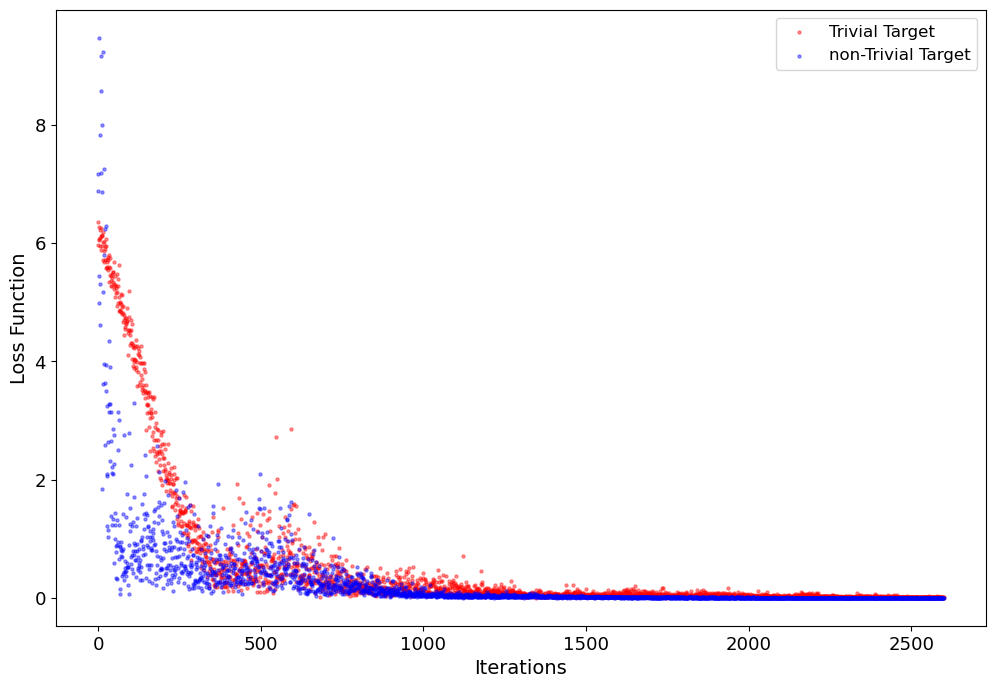

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['axes.labelsize'] = 14   # x/y axis labels
plt.rcParams['legend.fontsize'] = 12  # legend
plt.rcParams['xtick.labelsize'] = 13  # x ticks
plt.rcParams['ytick.labelsize'] = 13  # y ticks

# Load the data
LossFunction8 = pd.read_csv("LossFunction_8x8.txt", names=["lossfunction"])
LossFunction12 = pd.read_csv("LossFunction_8x8_ArbTarg.txt", names=["lossfunction"])

# Define a decay function for fitting
def decay_function(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the data for LossFunction8
x8 = LossFunction8.index
y8 = LossFunction8['lossfunction']
params8, _ = curve_fit(decay_function, x8, y8, p0=(1, 0.01, 0))

# Fit the data for LossFunction12
x12 = LossFunction12.index
y12 = LossFunction12['lossfunction']
params12, _ = curve_fit(decay_function, x12, y12, p0=(1, 0.01, 0))

# Generate the fitted curves
x_fit = np.linspace(0, max(len(x8), len(x12)), 1000)
y_fit8 = decay_function(x_fit, *params8)
y_fit12 = decay_function(x_fit, *params12)

# Plot the scatter plots and fitted curves
plt.figure(figsize=(12,8))
plt.scatter(x12, y12, color='red', s=5, alpha=0.4, label='Trivial Target')
plt.scatter(x8, y8, color='blue', s=5, alpha=0.4, label='non-Trivial Target')

'''# Plot the fitted curves
plt.plot(x_fit, y_fit12, color='darkred', linestyle='--', label='Fit: 12 by 12')
plt.plot(x_fit, y_fit8, color='darkblue', linestyle='--', label='Fit: 8 by 8')'''

# Add labels and title
plt.xlabel('Iterations')
plt.ylabel('Loss Function')
plt.legend()
plt.savefig("Loss Function Decay Plot.png",dpi=300, bbox_inches='tight')
plt.show()

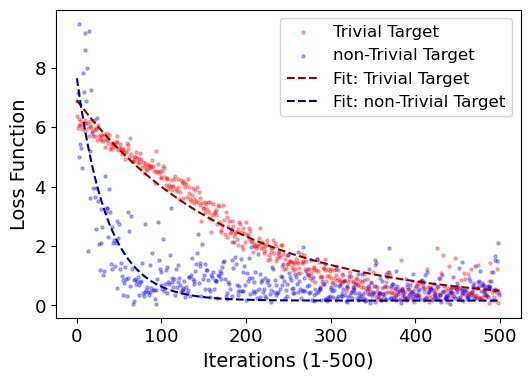

In [5]:
# Define the range for zoom-in (e.g., first 500 iterations)
zoom_range = 500

# Plot the scatter plots and fitted curves for the zoomed-in range
plt.figure(figsize=(6, 4))
plt.scatter(x12[:zoom_range], y12[:zoom_range], color='red', s=5, alpha=0.3, label='Trivial Target')
plt.scatter(x8[:zoom_range], y8[:zoom_range], color='blue', s=5, alpha=0.3, label='non-Trivial Target')

# Plot the fitted curves within the zoomed range
x_fit_zoom = np.linspace(0, zoom_range, 1000)
y_fit8_zoom = decay_function(x_fit_zoom, *params8)
y_fit12_zoom = decay_function(x_fit_zoom, *params12)
plt.plot(x_fit_zoom, y_fit12_zoom, color='darkred', linestyle='--', label='Fit: Trivial Target')
plt.plot(x_fit_zoom, y_fit8_zoom, color='darkblue', linestyle='--', label='Fit: non-Trivial Target')

# Add labels and title
plt.xlabel('Iterations (1-500)')
plt.ylabel('Loss Function')
plt.legend()
plt.savefig("Zoomed Loss Function Decay (Iterations 1-500).png",dpi=300, bbox_inches='tight')
plt.show()

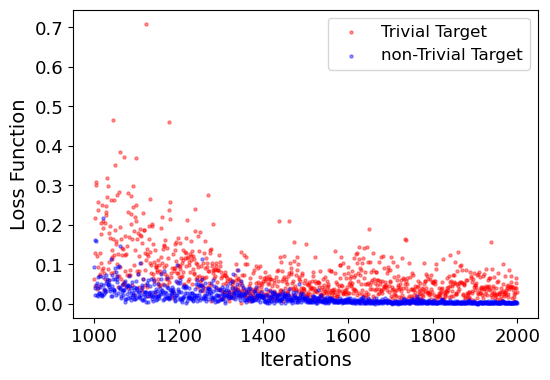

In [6]:
zoom_start = 1000
zoom_end = 2000

# Filter data for the zoomed-in range
x8_zoom = x8[zoom_start:zoom_end]
y8_zoom = y8[zoom_start:zoom_end]
x12_zoom = x12[zoom_start:zoom_end]
y12_zoom = y12[zoom_start:zoom_end]

# Plot the scatter plots and fitted curves for the zoomed-in range
plt.figure(figsize=(6, 4))
plt.scatter(x12_zoom, y12_zoom, color='red', s=5, alpha=0.4, label='Trivial Target')
plt.scatter(x8_zoom, y8_zoom, color='blue', s=5, alpha=0.4, label='non-Trivial Target')

'''# Plot the fitted curves within the zoomed range
x_fit_zoom = np.linspace(zoom_start, zoom_end, 1000)
y_fit8_zoom = decay_function(x_fit_zoom, *params8)
y_fit12_zoom = decay_function(x_fit_zoom, *params12)
plt.plot(x_fit_zoom, y_fit12_zoom, color='darkred', linestyle='--', label='Fit: 12 by 12')
plt.plot(x_fit_zoom, y_fit8_zoom, color='darkblue', linestyle='--', label='Fit: 8 by 8')'''

# Add labels and title
plt.xlabel('Iterations')
plt.ylabel('Loss Function')
plt.legend()
plt.savefig("Zoomed Loss Function Decay (Iterations 1000-2000).png",dpi=300, bbox_inches='tight')
plt.show()